In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf

In [3]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2950 - accuracy: 0.9136
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1441 - accuracy: 0.9564
Epoch 3/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.1062 - accuracy: 0.9670
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0879 - accuracy: 0.9729
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0770 - accuracy: 0.9753


In [9]:
model.evaluate(x_test,y_test,verbose=2)

10000/1 - 0s - loss: 0.0402 - accuracy: 0.9767


[0.0788663842718117, 0.9767]

In [10]:
import pandas as pd

In [11]:
test2 = pd.read_csv("test.csv")

In [12]:
x_test2=[]

In [13]:
for i,row in test2.iterrows():
    
    #plot_digits(row.values,images_per_row=1)
    x_test2.append(np.asarray(row.values.reshape((28,28))))
    #break

In [14]:
np.shape(x_test2)

(28000, 28, 28)

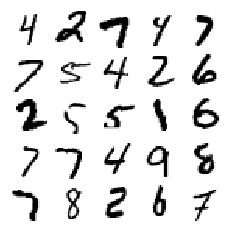

In [15]:
plot_digits(x_test2[25:50:],images_per_row=5)

In [16]:
ypred=model.predict(np.asarray(x_test2))

In [17]:
numpy.where(ypred[5]==np.amax(ypred[5]))[0][0]

9

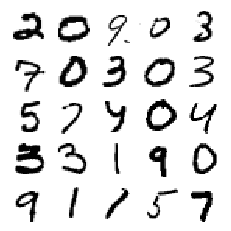

In [18]:
plot_digits(x_test2[0:25:],images_per_row=5)

In [19]:
imgid =[]
number=[]
for i,r in enumerate(ypred):
    #print(r)
    idx = numpy.where(r==np.amax(r))[0][0]
    imgid.append(i+1)
    number.append(idx)
    

In [20]:
results=pd.DataFrame(columns=['ImageId','Label'],index=None)
results['ImageId']=imgid
results['Label']=number

In [21]:
results.to_csv("predictions.csv", index=False)

In [22]:
df=pd.read_csv("predictions.csv")
len(df)

28000

In [36]:
x=tf.Variable(3,name='x',)
y=tf.Variable(4,name='y')
f = x*x*y + y + 2

init_op = tf.initialize_all_variables()

with tf.compat.v1.Session() as ses:
    # Build a graph.
    ses.run(init_op)
    #ses.run(y.initializer)
    # Evaluate the tensor `c`.
    print(ses.run(f))

AttributeError: module 'tensorflow' has no attribute 'initialize_all_variables'